In [4]:
#importing requried libraies
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
#load the data set
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#workflow: 1.diabates data---------->2.data preprocessing--->3.split the data
#4. feed it to a support maachine vector

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [9]:
data.shape

(768, 9)

In [10]:
#statisitical look to the data frame
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#label0-----------> non diabetic people and 1-------------diabetic people>

In [14]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [17]:
#saparating the data and label
x = data.drop(columns = 'Outcome',axis = 1)
y = data['Outcome']


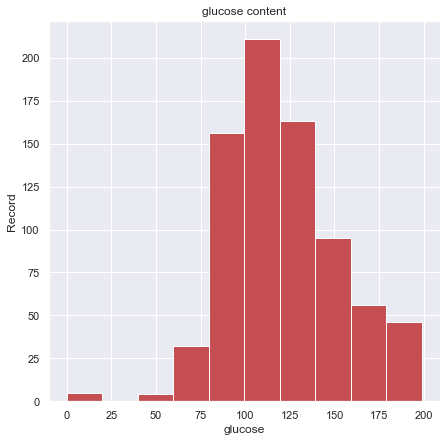

In [21]:
plt.figure(figsize = (7,7))
plt.hist(data['Glucose'],color = 'r')
plt.title("glucose content")
plt.xlabel("glucose")
plt.ylabel("Record")
plt.show()

In [34]:
#data standerdisation
scaler = StandardScaler()

In [35]:
scaler.fit(x)

StandardScaler()

In [37]:
standerdised_data = scaler.transform(x)

In [38]:
standerdised_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [66]:
x = standerdised_data
y = data['Outcome']

In [67]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state = 2)



In [68]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [69]:
classifier = svm.SVC(kernel = 'linear')

In [70]:
#training the support vector machine classifiner
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [71]:
#model evaluation 
# finding the accuraecy score
x_train_prediction = classifier.predict(x_train)

In [72]:
training_data_accurecy  = accuracy_score(x_train_prediction,y_train)

In [73]:
print("accurecy score of the training_data: ",training_data_accurecy)

accurecy score of the training_data:  0.7866449511400652


In [74]:
x_test_prediction = classifier.predict(x_test)
test_data_accurecy  = accuracy_score(x_test_prediction,y_test)

In [75]:
print("accurecy score of the test_data: ",test_data_accurecy)

accurecy score of the test_data:  0.7727272727272727


In [84]:
# making a predictive system
input_data = (1,85,66,29,0,26.6,0.351,31)
# changing the data in numpy array
input_data_as_numpy_array = nm.asarray(input_data)

#reshapeing the array as we are predicting the one instances
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

#then stranderdize the data
std_data = scaler.transform(input_data_reshape)
print(std_data)



[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [85]:
prediction = classifier.predict(std_data)

In [88]:
if prediction[0]==0:
    print("person has no diabetes")
else:
    print("person has diabetes")

person has no diabetes


person has no diabetes
